# HTTP Detection
HTTP Detection use machine learning to detect anomalous HTTP request.  
Dataset: [CSIC 2010 HTTP Dataset](https://petescully.co.uk/research/csic-2010-http-dataset-in-csv-format-for-weka-analysis/)  
In this code, we trained Three models, including random forest model, n-gram CNN model, and n-gram LSTM model.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from utils import evaluate_model
import os
from sklearn.ensemble import RandomForestClassifier

# Number of CPUs for ensemble learning methods
N_ENSEMBLE_CPUS = max(os.cpu_count()//2, 1)

## Analysis HTTP Request Attributes
We will first combine normal data and anomalous data.  
Then we will analyze the value in HTTP requests.  
We will find out those values that are same in every request, and these data will not be used to train our model.  

In [11]:
normal_traffic_dataset = pd.read_csv("dataset/normalTrafficTraining.csv")
anomalous_traffic_dataset = pd.read_csv("dataset/anomalousTrafficTest.csv")
# Preview the dataset
traffic_dataset = pd.concat([normal_traffic_dataset, anomalous_traffic_dataset])

In [12]:
# The attribute that all have same value in every columns.
same_value_columns = []
for name, item in traffic_dataset.items():
    if len(item.unique()) == 1:
        same_value_columns.append(name)
print("same value columns: ", same_value_columns)

same value columns:  ['protocol', 'userAgent', 'pragma', 'cacheControl', 'accept', 'acceptEncoding', 'acceptCharset', 'acceptLanguage', 'connection']


In [13]:
# The attribute that all have binary value.
binary_columns = []
print("value in binary column")
for name, item in traffic_dataset.items():
    if len(item.unique()) == 2:
        print(item.unique())
        binary_columns.append(name)
print("binary columns: ", binary_columns)

# The attribute that have multiple value.
multiple_columns = []
for name, item in traffic_dataset.items():
    if len(item.unique()) > 2:
        multiple_columns.append(name)
print("multiple columns: ", multiple_columns)

value in binary column
['GET' 'POST']
['localhost:8080' 'localhost:9090']
[nan 'application/x-www-form-urlencoded']
['norm' 'anom']
binary columns:  ['method', 'host', 'contentType', 'label']
multiple columns:  ['url', 'contentLength', 'cookie', 'payload']


## Random Forest Model
We use three datasets to train the model
- GET & POST
- GET only
- POST only

For each of the dataset, we used them to train three models.  
The number of decision trees in three models are 5, 40, and 100.

In [14]:
feat_get_post = traffic_dataset[['method', 'host', 'contentType', 'contentLength', 'label']]
feat_get_post = feat_get_post.replace({"method" : {"GET" : 0, "POST" : 1}})
feat_get_post = feat_get_post.replace({"host" : {"localhost:8080" : 0, "localhost:9090" : 1}})
feat_get_post = feat_get_post.replace({"contentType" : {"application/x-www-form-urlencoded" : 1}})
feat_get_post = feat_get_post.replace({"label" : {"norm" : 0, "anom" : 1}})
feat_get_post = feat_get_post.fillna(0)

feat_all = feat_get_post.drop(["label"], axis=1).values
y_all = feat_get_post["label"]
feat_train, feat_test, y_train, y_test = train_test_split(
    feat_all, y_all, test_size=0.4, random_state=0
)

rf_5_model = RandomForestClassifier(n_estimators=5, n_jobs=N_ENSEMBLE_CPUS)
rf_5_model.fit(feat_train, y_train)

rf_40_model = RandomForestClassifier(n_estimators=40, n_jobs=N_ENSEMBLE_CPUS)
rf_40_model.fit(feat_train, y_train)

rf_100_model = RandomForestClassifier(n_jobs=N_ENSEMBLE_CPUS)
rf_100_model.fit(feat_train, y_train)

evaluate_model(rf_5_model, "Random forest classifier using GET & POST (5 DTs)", feat_test, y_test)
evaluate_model(rf_40_model, "Random forest classifier using GET & POST (40 DTs)", feat_test, y_test)
evaluate_model(rf_100_model, "Random forest classifier using GET & POST (100 DTs)", feat_test, y_test)

[ Evaluation result for Random forest classifier using GET & POST (5 DTs) ]
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79     14373
           1       0.81      0.32      0.46      9895

    accuracy                           0.69     24268
   macro avg       0.74      0.64      0.62     24268
weighted avg       0.73      0.69      0.65     24268

Confusion matrix:
[[13639   734]
 [ 6711  3184]] 

[ Evaluation result for Random forest classifier using GET & POST (40 DTs) ]
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79     14373
           1       0.81      0.32      0.46      9895

    accuracy                           0.69     24268
   macro avg       0.74      0.64      0.62     24268
weighted avg       0.73      0.69      0.65     24268

Confusion matrix:
[[13632   741]
 [ 6710  3185]] 

[ Evaluation result for Random forest classif

In [15]:
feat_get = traffic_dataset[['method', 'host', 'contentType', 'contentLength', 'label']]
feat_get = feat_get[feat_get["method"] == "GET"]
feat_get = feat_get.replace({"method" : {"GET" : 0, "POST" : 1}})
feat_get = feat_get.replace({"host" : {"localhost:8080" : 0, "localhost:9090" : 1}})
feat_get = feat_get.replace({"contentType" : {"application/x-www-form-urlencoded" : 1}})
feat_get = feat_get.replace({"label" : {"norm" : 0, "anom" : 1}})
feat_get = feat_get.fillna(0)

feat_all = feat_get.drop(["label"], axis=1).values
y_all = feat_get["label"]
feat_train, feat_test, y_train, y_test = train_test_split(
    feat_all, y_all, test_size=0.4, random_state=0
)

rf_5_model = RandomForestClassifier(n_estimators=5, n_jobs=N_ENSEMBLE_CPUS)
rf_5_model.fit(feat_train, y_train)

rf_40_model = RandomForestClassifier(n_estimators=40, n_jobs=N_ENSEMBLE_CPUS)
rf_40_model.fit(feat_train, y_train)

rf_100_model = RandomForestClassifier(n_jobs=N_ENSEMBLE_CPUS)
rf_100_model.fit(feat_train, y_train)

evaluate_model(rf_5_model, "Random forest classifier using GET (5 DTs)", feat_test, y_test)
evaluate_model(rf_40_model, "Random forest classifier using GET (40 DTs)", feat_test, y_test)
evaluate_model(rf_100_model, "Random forest classifier using GET (100 DTs)", feat_test, y_test)

[ Evaluation result for Random forest classifier using GET (5 DTs) ]
Classification report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     11227
           1       1.00      0.02      0.03      6009

    accuracy                           0.66     17236
   macro avg       0.83      0.51      0.41     17236
weighted avg       0.78      0.66      0.53     17236

Confusion matrix:
[[11227     0]
 [ 5907   102]] 

[ Evaluation result for Random forest classifier using GET (40 DTs) ]
Classification report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     11227
           1       1.00      0.02      0.03      6009

    accuracy                           0.66     17236
   macro avg       0.83      0.51      0.41     17236
weighted avg       0.78      0.66      0.53     17236

Confusion matrix:
[[11227     0]
 [ 5907   102]] 

[ Evaluation result for Random forest classifier using GET 

In [16]:
feat_post = traffic_dataset[['method', 'host', 'contentType', 'contentLength', 'label']]
feat_post = feat_post[feat_post["method"] == "POST"]
feat_post = feat_post.replace({"method" : {"GET" : 0, "POST" : 1}})
feat_post = feat_post.replace({"host" : {"localhost:8080" : 0, "localhost:9090" : 1}})
feat_post = feat_post.replace({"contentType" : {"application/x-www-form-urlencoded" : 1}})
feat_post = feat_post.replace({"label" : {"norm" : 0, "anom" : 1}})
feat_post = feat_post.fillna(0)

feat_all = feat_post.drop(["label"], axis=1).values
y_all = feat_post["label"]
feat_train, feat_test, y_train, y_test = train_test_split(
    feat_all, y_all, test_size=0.4, random_state=0
)
rf_5_model = RandomForestClassifier(n_estimators=5, n_jobs=N_ENSEMBLE_CPUS)
rf_5_model.fit(feat_train, y_train)

rf_40_model = RandomForestClassifier(n_estimators=40, n_jobs=N_ENSEMBLE_CPUS)
rf_40_model.fit(feat_train, y_train)

rf_100_model = RandomForestClassifier(n_jobs=N_ENSEMBLE_CPUS)
rf_100_model.fit(feat_train, y_train)

evaluate_model(rf_5_model, "Random forest classifier (5 DTs)", feat_test, y_test)
evaluate_model(rf_40_model, "Random forest classifier (40 DTs)", feat_test, y_test)
evaluate_model(rf_100_model, "Random forest classifier (100 DTs)", feat_test, y_test)

[ Evaluation result for Random forest classifier (5 DTs) ]
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      3186
           1       0.80      0.82      0.81      3846

    accuracy                           0.79      7032
   macro avg       0.79      0.79      0.79      7032
weighted avg       0.79      0.79      0.79      7032

Confusion matrix:
[[2402  784]
 [ 676 3170]] 

[ Evaluation result for Random forest classifier (40 DTs) ]
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      3186
           1       0.80      0.82      0.81      3846

    accuracy                           0.79      7032
   macro avg       0.79      0.79      0.79      7032
weighted avg       0.79      0.79      0.79      7032

Confusion matrix:
[[2400  786]
 [ 690 3156]] 

[ Evaluation result for Random forest classifier (100 DTs) ]
Classification report:
   

## CNN Models

In [18]:
# training attributes
target = 'url'

# whole dataset
normal_traffic_dataset = pd.read_csv('dataset/normalTrafficTraining.csv', usecols=[target, 'label'])
anomalous_traffic_dataset = pd.read_csv("dataset/anomalousTrafficTest.csv", usecols=[target, 'label'])

# GET or POST only
# normal_traffic_dataset = pd.read_csv('dataset/normalTrafficTraining.csv', usecols=['method', target, 'label'])
# anomalous_traffic_dataset = pd.read_csv("dataset/anomalousTrafficTest.csv", usecols=['method', target, 'label'])
# normal_target_dataset = normal_traffic_dataset.loc[normal_traffic_dataset['method'] == "POST", [target,'label']]
# anomalous_target_dataset = anomalous_traffic_dataset.loc[anomalous_traffic_dataset['method'] == "POST", [target,'label']]

normal_target_dataset = normal_traffic_dataset
anomalous_target_dataset = anomalous_traffic_dataset

normal_target_dataset['label'] = normal_target_dataset['label'].map({'norm': 0})
anomalous_target_dataset['label'] = anomalous_target_dataset['label'].map({'anom': 1})

# Preview the dataset
traffic_dataset = pd.concat([normal_traffic_dataset, anomalous_traffic_dataset])
print(traffic_dataset)

                                                     url  label
0                http://localhost:8080/tienda1/index.jsp      0
1      http://localhost:8080/tienda1/publico/anadir.j...      0
2       http://localhost:8080/tienda1/publico/anadir.jsp      0
3      http://localhost:8080/tienda1/publico/autentic...      0
4      http://localhost:8080/tienda1/publico/autentic...      0
...                                                  ...    ...
24663  http://localhost:8080/tienda1/miembros/editar....      1
24664  http://localhost:8080/tienda1/miembros/editar.jsp      1
24665  http://localhost:8080/tienda1/miembros/editar....      1
24666      http://localhost:8080/tienda1/imagenes/3.gif/      1
24667  http://localhost:8080/tienda1/imagenes/nuestra...      1

[60668 rows x 2 columns]


The sample will be split into training (60%), validation (20%) and test (20%).

In [19]:
from sklearn.model_selection import train_test_split

# Split URLs and labels into training, validation and test sets
urls_tv, urls_test, labels_tv, labels_test = train_test_split(
    traffic_dataset[target], traffic_dataset["label"], test_size=0.2, random_state=12345
)

urls_train, urls_vali, labels_train, labels_vali = train_test_split(
    urls_tv, labels_tv, test_size=0.25, random_state=12345
)

Build N-Gram Mappings

In [20]:
def iter_ngrams(text, n, start_symbol="\x00", end_symbol="\x01"):
    """ Returns an iterable that yields all N-grams of the text with start and end padding. """
    padding_text = start_symbol * (n - 1) + text + end_symbol * n
    result = []
    for i in range(len(text) + n):
        result.append(padding_text[i:i + n])
    return result

Build a bidirectional mapping for all unique N-grams occurring in our dataset.  
The function responsible for this step is the following build_ngram_mapping function, which takes a list of urls, n as in N-grams and a rare_threshold under which an N-gram will be marked as rare and discarded.

In [21]:
from tqdm import tqdm

def build_ngram_mapping(urls, n, rare_threshold=2):
    """ Build bidirectional N-gram to numerical index mapping, ignoring rare N-grams. """
    # N-gram occurrences count
    ngram_count = {} #map
    
    print("Counting occurrences for unique N-grams...", flush=True)
    for url in tqdm(urls):
        for ngram in iter_ngrams(url, n):
            if ngram in ngram_count:
                ngram_count[ngram] += 1
            else:
                ngram_count[ngram] = 1
    
    # N-gram to index mapping
    n2i_mapping = {}
    # Index to N-gram mapping
    i2n_mapping = []
    
    # Total occurrence of all N-grams
    n_occurrence = sum(ngram_count.values())
    # Total occurrence of rare N-grams
    n_occurrence_rare = 0
    
    print("Building bidirectional N-gram to numerical index mapping...", flush=True)
    for ngram, count in tqdm(ngram_count.items()):
        if count >= rare_threshold:
            n2i_mapping[ngram] = len(n2i_mapping)
            i2n_mapping.append(ngram)
        else:
            n_occurrence_rare += 1
    
    # Rare occurrence percentage
    rare_occurrence_pc = n_occurrence_rare/n_occurrence*100
    
    # Total number of unique N-grams
    n_ngram = len(ngram_count)
    # Total number of unique rare N-grams
    n_ngram_rare = n_ngram-len(i2n_mapping)
    # Rare unique N-grams percentage
    rare_ngram_pc = n_ngram_rare/n_ngram*100
    
    # Print occurrence and unique N-grams metrics
    print(f"Total occurrence: {n_occurrence} ({n_occurrence_rare} rare, {rare_occurrence_pc:.2f}%)")
    print(f"Unique N-grams: {n_ngram} ({n_ngram_rare} rare, {rare_ngram_pc:.2f}%)")
    
    # Return bidirectional mappings
    return n2i_mapping, i2n_mapping

Build co-occurrence matrix for all unique N-grams.  
This is done by the build_occurrence_matrix below, which takes a list of urls, n as in N-grams, the n2i_mapping we have generated from the last step and a window_size parameter.

In [22]:
import math

from scipy.sparse import dok_matrix

def build_cooccurrence_matrix(urls, n, n2i_mapping, window_size, report_interval=0.05):
    """ Build co-occurrence matrix for character N-grams from URLs. """
    # Number of unique N-grams / index for unknown symbol
    n_ngram = unknown_index = len(n2i_mapping)
    # Co-occurrence matrix (DOK sparse matrix)
    cooccurrence_matrix = dok_matrix((n_ngram+1, n_ngram+1))
    
    print(f"Counting co-occurrence of N-grams (n = {n})...", flush=True)
    # Co-occurrence counting loop
    for url in tqdm(urls):
        # Previous neighboring N-gram indices for current URL
        prev_ngram_indices = []
        
        for ngram in iter_ngrams(url, n):
            ## [ TODO ]
            # 1) Get index for current N-gram from mapping
            #    (Hint: set `ngram_index` to `unknown_index` if it is not find in mapping)
            ngram_index = n2i_mapping[ngram] if ngram in n2i_mapping else unknown_index
            
            # 2) Update co-occurrence matrix for previous neighboring N-grams in window
            for prev_index in prev_ngram_indices:
                cooccurrence_matrix[ngram_index, prev_index] += 1
                cooccurrence_matrix[prev_index, ngram_index] += 1

            # Add current N-gram index
            prev_ngram_indices.append(ngram_index)
            if len(prev_ngram_indices) > window_size:
                prev_ngram_indices.pop(0)

    print("Normalizing co-occurrence frequencies...", flush=True)
    # Sum of co-occurrence frequencies
    co_sum = cooccurrence_matrix.sum(-1)
    ## [ TODO ]
    # 3) Normalize co-occurrence frequencies into distributions for each row
    for i, j in tqdm(cooccurrence_matrix.keys()):
        cooccurrence_matrix[i, j] /= co_sum[i]
    
    print("Completed.")
    # Return co-occurrence matrix
    return cooccurrence_matrix

Build a co-occurrence matrix for all URLs

In [23]:
# N of N-grams
N = 4

# Build bidirectional N-gram mapping for all URLs
n2i_urls, i2n_urls = build_ngram_mapping(urls_train, N)
# Build co-occurrence matrix for character N-grams from URLs
cooccurrence_urls = build_cooccurrence_matrix(
    urls_train, N, n2i_mapping=n2i_urls, window_size=N
)

# Review co-occurrence matrix
print(type(cooccurrence_urls), cooccurrence_urls.shape)

Counting occurrences for unique N-grams...


100%|██████████| 36400/36400 [00:01<00:00, 32560.13it/s]

Building bidirectional N-gram to numerical index mapping...



100%|██████████| 89440/89440 [00:00<00:00, 1852161.04it/s]

Total occurrence: 3113334 (32399 rare, 1.04%)
Unique N-grams: 89440 (32399 rare, 36.22%)
Counting co-occurrence of N-grams (n = 4)...



100%|██████████| 36400/36400 [09:01<00:00, 67.24it/s]

Normalizing co-occurrence frequencies...



100%|██████████| 1570839/1570839 [00:51<00:00, 30628.28it/s]

Completed.
<class 'scipy.sparse._dok.dok_matrix'> (57042, 57042)


We will use the TruncatedSVD algorithm to reduce the dimensions of the co-occurrence matrix in order to create an embedding for every unique N-gram

In [24]:
from sklearn.decomposition import TruncatedSVD

# Number of embedding dimensions
EMBEDDING_DIMS_SVD = 120

svd = TruncatedSVD(n_components=EMBEDDING_DIMS_SVD, n_iter=6, random_state=12345)
embedding_svd = svd.fit_transform(cooccurrence_urls)

### Training
Build a neural network model for classification. The neural network below is again a Convolutional Neural Network, but it utilizes one-dimensional convolution and max pooling layers because our inputs are one-dimensional sequences rather than two-dimensional images. It also includes an embedding layer that accepts sequences of N-gram indices and outputs the look-up results of N-gram embedding vectors.

In [25]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.initializers import Constant

def build_cnn_model(n_ngram, embedding_dims, padded_len, n, embedding_weights, dropout_ratio=0., optimizer="adam"):
    model = Sequential()
    # 1) Embedding layer: (*, 100) -Embedding-> (*, 100, 10)
    model.add(layers.Embedding(n_ngram + 1, embedding_weights.shape[1], input_length=padded_len+n, trainable=False, embeddings_initializer=Constant(embedding_weights))) 
    # 2) First convolution block: (*, 100, 10) -Conv1D+ReLU-> (*, 100, 20) -MaxPooling1D-> (*, 50, 20)
    #    - Convolution layer: 20 channels, kernel size set to 5, ReLU activation, padded to maintain same shape
    model.add(layers.Conv1D(20, 5, padding="same", activation="relu"))
    #    - Max pooling layer: kernel size and stride set to 2
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))
    # 3) Second convolution block: (*, 50, 20) -Conv1D+ReLU-> (*, 50, 40) -MaxPooling1D-> (*, 10, 40)
    #    - Convolution layer: 40 channels, kernel size set to 5, ReLU activation, padded to maintain same shape
    model.add(layers.Conv1D(40, 5, padding="same", activation="relu"))
    #    - Max pooling layer: kernel size and stride set to 5
    model.add(layers.MaxPooling1D(pool_size=5, strides=5))
    # 4) Third convolution block: (*, 10, 40) -Conv1D+ReLU-> (*, 10, 80) -MaxPooling1D-> (*, 2, 80)
    #    - Convolution layer: 80 channels, kernel size set to 5, ReLU activation, padded to maintain same shape
    model.add(layers.Conv1D(80, 5, padding="same", activation="relu"))
    #    - Max pooling layer: kernel size and stride set to 5
    model.add(layers.MaxPooling1D(pool_size=5, strides=5))
    # 5) Flatten layer: (*, 2, 80) -Flatten-> (*, 160)
    model.add(layers.Flatten())
    # 6) First fully-connected layer: (*, 160) -Dense+ReLU-> (*, 16)
    #    - Dense layer: ReLU activation
    model.add(layers.Dense(16, activation="relu"))
    # 7) Dropout layer: shape unchanged, dropout ratio set to `dropout_ratio`
    model.add(layers.Dropout(dropout_ratio))
    # 8) Last fully-connected layer: (*, 16) -Dense+Sigmoid-> (*, 1)
    #    - Dense layer: Sigmoid activation
    model.add(layers.Dense(1, activation="sigmoid"))

    # Compile the classification model
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    # Return the model
    return model

The neural network model takes sequences of N-gram indices rather than raw URLs as an input. Thus an extra function, transform_urls, is needed to perform conversion between the two formats

In [26]:
import numpy as np

def transform_urls(batch_urls, padded_len, n, n2i_mapping, pad_symbol="\x01"):
    # Batch size
    batch_size = len(batch_urls)
    # Batch input to the classification model
    batch_input = np.empty((batch_size, padded_len+n), dtype=int)
    
    # Index for unknown symbol
    unknown_index = len(n2i_mapping)
    
    for i, url in enumerate(batch_urls):
        url += pad_symbol * (padded_len - len(url))
        for j, ngram in enumerate(iter_ngrams(url, n)):
            batch_input[i, j] = n2i_mapping[ngram] if ngram in n2i_mapping else unknown_index
    
    return batch_input

We would like Keras to call transform_urls for every batch of URLs during training. To achieve this, we will wrap our training and validation set in a SamplesWrapper, which implements the keras.utils.Sequence interface and automatically performs convertion of URLs whenever a new batch of samples is needed

In [27]:
import math

from tensorflow.keras.utils import Sequence

class SamplesWrapper(Sequence):
    """ Wrapper dataset that performs convertion of URLs on the fly. """
    def __init__(self, urls, labels, batch_size, padded_len, n, n2i_mapping):
        ## URLs
        self.urls = urls
        ## Labels
        self.labels = labels.values.astype(float)
        ## Batch size
        self.batch_size = batch_size
        
        ## Length of padded URL
        self.padded_len = padded_len
        ## N of N-gram
        self.n = n
        ## N-gram to index mapping
        self.n2i_mapping = n2i_mapping
    
    def __len__(self):
        return math.ceil(len(self.urls)/self.batch_size)
    
    def __getitem__(self, batch_idx):
        # Start and end index of batch
        batch_start = self.batch_size*batch_idx
        batch_end = batch_start+self.batch_size
        
        # Get and transform batch of URLs
        batch_urls = transform_urls(
            self.urls[batch_start:batch_end],
            self.padded_len,
            self.n,
            self.n2i_mapping
        )
        # Get batch of one-hot encoded labels
        batch_labels = self.labels[batch_start:batch_end]
        
        return batch_urls, batch_labels

In [29]:
# Batch size for training
BATCH_SIZE = 256

MAX_URL_LEN = traffic_dataset[target].str.len().max()

# Build a CNN model
cnn_model = build_cnn_model(
    n_ngram=len(n2i_urls),
    embedding_dims=EMBEDDING_DIMS_SVD,
    padded_len=MAX_URL_LEN,
    n=N,
    embedding_weights=embedding_svd,
    dropout_ratio=0.25
)

cnn_model.summary()

# Wrapper for training samples
wrapper_train = SamplesWrapper(
    urls_train,
    labels_train,
    BATCH_SIZE,
    padded_len=MAX_URL_LEN,
    n=N,
    n2i_mapping=n2i_urls
)
# Wrapper for validation samples
wrapper_vali = SamplesWrapper(
    urls_vali,
    labels_vali,
    BATCH_SIZE,
    padded_len=MAX_URL_LEN,
    n=N,
    n2i_mapping=n2i_urls
)

# Train the basic model for 10 epochs
cnn_history = cnn_model.fit(wrapper_train, validation_data=wrapper_vali, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 890, 120)          6845040   
                                                                 
 conv1d_3 (Conv1D)           (None, 890, 20)           12020     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 445, 20)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 445, 40)           4040      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 89, 40)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 89, 80)           

## Evaluation
Plot the loss and accuracy of each epoch on both the training and the validation set

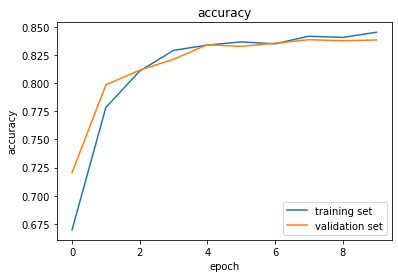

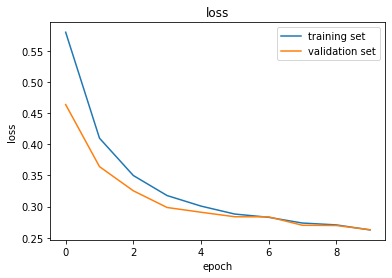

In [30]:
from matplotlib import pyplot as plt

plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title("accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training set", "validation set"])
plt.show()

plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training set", "validation set"])
plt.show()

Evaluate the performance of the whole pipeline on the test set:
1. Transforming the test URLs into N-gram index sequences by calling the transform_urls function. Except we are transforming all URLs at once, all other parameters of the transform_urls function remain the same.
2. The N-gram index sequences are then fed into the neural network model, which computes the log probability of whether the URL is malicious or not.
3. The output of the neural network model are then converted back into numerical labels with np.argmax.
4. Finally, with both prediction and actual labels, we generate the confusion_matrix and classification_report for the result on the test set.

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

transformed_urls_test = transform_urls(urls_test, MAX_URL_LEN, N, n2i_urls)

# Predict results for test URLs
preds_test = cnn_model.predict(transformed_urls_test)
for preds in preds_test:
    for i, pred in enumerate(preds):
        preds[i] = 0 if pred < 0.5 else 1
        
print(f"[ Evaluation result for CNN model ]")
# Confusion matrix
print("Testing confusion matrix:\n", confusion_matrix(labels_test, preds_test), "\n")
# Classification report
print("Testing metrics:\n", classification_report(labels_test, preds_test))

380/380 [==============================] - 1s 2ms/step
[ Evaluation result for CNN model ]
Testing confusion matrix:
 [[5463 1680]
 [ 352 4639]] 

Testing metrics:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      7143
           1       0.73      0.93      0.82      4991

    accuracy                           0.83     12134
   macro avg       0.84      0.85      0.83     12134
weighted avg       0.86      0.83      0.83     12134



## Bidirectional LSTM model

In [32]:
from sklearn.decomposition import TruncatedSVD

# Number of embedding dimensions
EMBEDDING_DIMS_SVD = 100

svd = TruncatedSVD(n_components=EMBEDDING_DIMS_SVD, n_iter=6, random_state=12345)
embedding_svd = svd.fit_transform(cooccurrence_urls)

In [33]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.initializers import Constant

def build_lstm_model(n_ngram, embedding_dims, padded_len, n, embedding_weights, dropout_ratio=0., optimizer="adam"):
    model = Sequential()
    # 1) Embedding layer: (*, 100) -Embedding-> (*, 100, 10)
    model.add(layers.Embedding(n_ngram + 1, embedding_weights.shape[1], input_length=padded_len+n, embeddings_initializer=Constant(embedding_weights))) 
    # 2) LSTM
    model.add(layers.Bidirectional(layers.LSTM(64)))
    # 3) First fully-connected layer: (*, 160) -Dense+ReLU-> (*, 16)
    #    - Dense layer: ReLU activation
    model.add(layers.Dense(64, activation="relu"))
    # 4) Dropout layer: shape unchanged, dropout ratio set to `dropout_ratio`
    model.add(layers.Dropout(dropout_ratio))
    # 5) Last fully-connected layer: (*, 16) -Dense+Sigmoid-> (*, 1)
    #    - Dense layer: Sigmoid activation
    model.add(layers.Dense(1, activation="sigmoid"))
    # Compile the classification model
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    # Return the model
    return model

In [34]:
# Batch size for training
BATCH_SIZE = 256

# Build a basic CNN model
lstm_model = build_lstm_model(
    n_ngram=len(n2i_urls),
    embedding_dims=EMBEDDING_DIMS_SVD,
    padded_len=MAX_URL_LEN,
    n=N,
    embedding_weights=embedding_svd,
    dropout_ratio=0.25
)

lstm_model.summary()

# Wrapper for training samples
wrapper_train = SamplesWrapper(
    urls_train,
    labels_train,
    BATCH_SIZE,
    padded_len=MAX_URL_LEN,
    n=N,
    n2i_mapping=n2i_urls
)
# Wrapper for validation samples
wrapper_vali = SamplesWrapper(
    urls_vali,
    labels_vali,
    BATCH_SIZE,
    padded_len=MAX_URL_LEN,
    n=N,
    n2i_mapping=n2i_urls
)

# Train the LSTM model for 10 epochs
lstm_history = lstm_model.fit(wrapper_train, validation_data=wrapper_vali, epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 890, 100)          5704200   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,797,001
Trainable params: 5,797,001
Non-trainable params: 0
____________________________________________

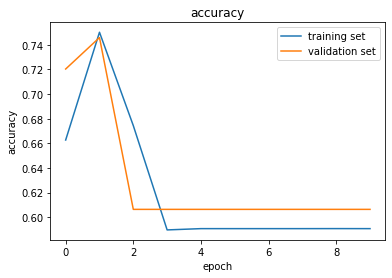

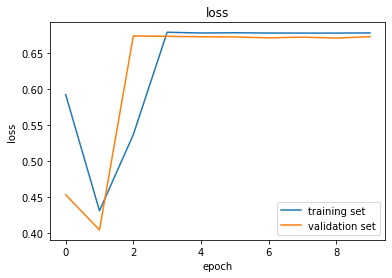

In [35]:
from matplotlib import pyplot as plt

plt.plot(lstm_history.history["accuracy"])
plt.plot(lstm_history.history["val_accuracy"])
plt.title("accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training set", "validation set"])
plt.show()

plt.plot(lstm_history.history["loss"])
plt.plot(lstm_history.history["val_loss"])
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training set", "validation set"])
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

transformed_urls_test = transform_urls(urls_test, MAX_URL_LEN, N, n2i_urls)

# Predict results for test URLs
preds_test = lstm_model.predict(transformed_urls_test)
for preds in preds_test:
    for i, pred in enumerate(preds):
        preds[i] = 0 if pred < 0.5 else 1
        
print(f"[ Evaluation result for LSTM model ]")
# Confusion matrix
print("Testing confusion matrix:\n", confusion_matrix(labels_test, preds_test), "\n")
# Classification report
print("Testing metrics:\n", classification_report(labels_test, preds_test))

380/380 [==============================] - 8s 22ms/step
[ Evaluation result for LSTM model ]
Testing confusion matrix:
 [[7143    0]
 [4991    0]] 

Testing metrics:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74      7143
           1       0.00      0.00      0.00      4991

    accuracy                           0.59     12134
   macro avg       0.29      0.50      0.37     12134
weighted avg       0.35      0.59      0.44     12134



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
